**REF KEYWORD SEARCH**

In [6]:
import pandas as pd
from lxml import html
import requests
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from tqdm import tqdm

In [7]:
units_of_assessment = pd.Series(['Clinical Medicine', 'Public Health, Health Services and Primary Care',
        'Allied Health Professions, Dentistry, Nursing and Pharmacy',
        'Psychology, Psychiatry and Neuroscience', 'Biological Sciences',
        'Agriculture, Veterinary and Food Science',
        'Earth Systems and Environmental Sciences', 'Chemistry', 'Physics',
        'Mathematical Sciences', 'Computer Science and Informatics',
        'Aeronautical, Mechanical, Chemical and Manufacturing Engineering',
        'Electrical and Electronic Engineering, Metallurgy and Materials',
        'Civil and Construction Engineering', 'General Engineering',
        'Architecture, Built Environment and Planning',
        'Geography, Environmental Studies and Archaeology',
        'Economics and Econometrics', 'Business and Management Studies', 'Law',
        'Politics and International Studies', 'Social Work and Social Policy',
        'Sociology', 'Anthropology and Development Studies', 'Education',
        'Sport and Exercise Sciences, Leisure and Tourism', 'Area Studies',
        'Modern Languages and Linguistics', 'English Language and Literature',
        'History', 'Classics', 'Philosophy', 'Theology and Religious Studies',
        'Art and Design: History, Practice and Theory',
        'Music, Drama, Dance and Performing Arts',
        'Communication, Cultural and Media Studies, Library and Information Management'])

uoa_report_count = pd.Series([383,163,343,317,257,126,171,125,181,210,251,120,126,51,240,
            142,235,98,411,216,166,187,97,80,215,122,69,190,281,263,59,98,75,231,194,159])

#create dataframe containing unit of assessment labels and number of case studies
query_df = pd.DataFrame({'unit of assessment': units_of_assessment, 'number of studies': uoa_report_count})

 health


100%|██████████| 36/36 [00:21<00:00,  1.60it/s]


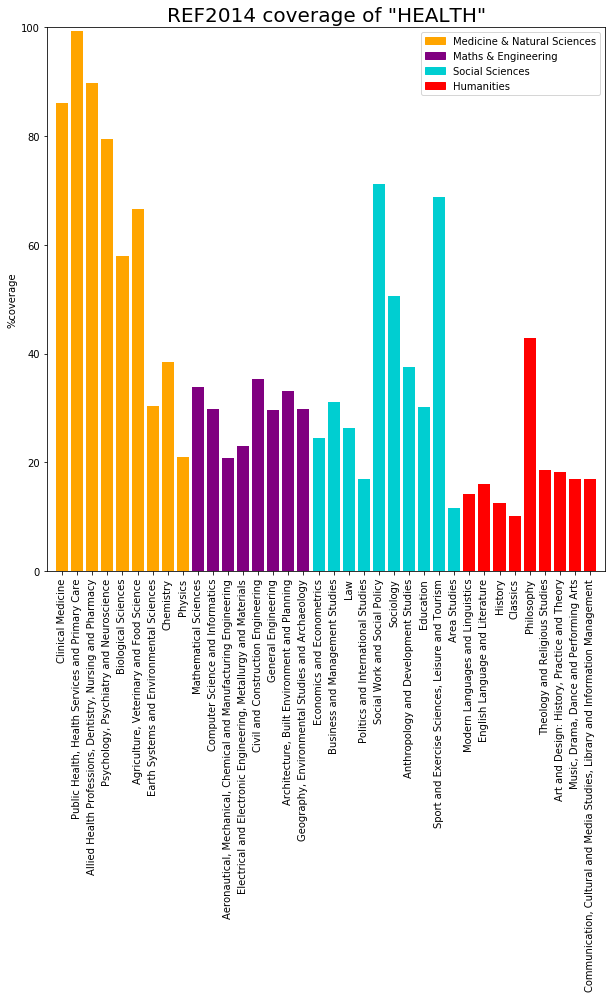

In [11]:
#input keyword 
query = input()

#loop through units of assessment, extracting int values and appending to empty list query_uoa
query_uoa = []
for uoa in tqdm(range(1,37)):
    data = requests.get('https://impact.ref.ac.uk/casestudies/Results.aspx?UoA='+str(uoa)+'&val='+'\"'+query+'\"')
    search_hit = html.fromstring(data.content).xpath('//span[@id=\"MainContent_lblTagHits\"]/text()')
    if search_hit == []:
        query_uoa.append(0)
    else:
        query_uoa.append(int(search_hit[0]))

#create %coverage column in query_df as percentage score for each keyword per unit of assessment  
query_df['%coverage'] = query_uoa/query_df['number of studies']*100

#Generate bar chart using pyplot
x_pos = np.arange(len(query_df['unit of assessment']))
y_axis = query_df['%coverage']
color = ['orange']*9 + ['purple']*8 + ['darkturquoise']*10+ ['red']*9
panel_one = mpatches.Patch(color='orange', label='Medicine & Natural Sciences')
panel_two = mpatches.Patch(color='purple', label='Maths & Engineering')
panel_three = mpatches.Patch(color='darkturquoise', label='Social Sciences')
panel_four = mpatches.Patch(color='red', label='Humanities')
plt.figure(figsize=(10,10))
plt.bar(x_pos, y_axis, color=color, align='center')
plt.xticks(x_pos, query_df['unit of assessment'], rotation='vertical')
plt.ylabel('%coverage')
plt.title('REF2014 coverage of \"'+query.upper()+'\"',fontsize=20)
plt.axis([-1, 36, 0,100])
plt.legend(handles=[panel_one, panel_two, panel_three,panel_four])


plt.show()